In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data.csv")
df.head()

,Date,Max_Temperature,Min_Temperature,Rainfall
0,2010-01-01,25.2,9.4,0.0
1,2010-01-02,25.8,13.1,0.4
2,2010-01-03,23.3,12.2,0.0
3,2010-01-04,22.4,8.9,0.0
4,2010-01-05,22.3,7.8,0.0


In [4]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [5]:
df.head()

,Date,Max_Temperature,Min_Temperature,Rainfall,Year,Month,Day
0,2010-01-01,25.2,9.4,0.0,2010,1,1
1,2010-01-02,25.8,13.1,0.4,2010,1,2
2,2010-01-03,23.3,12.2,0.0,2010,1,3
3,2010-01-04,22.4,8.9,0.0,2010,1,4
4,2010-01-05,22.3,7.8,0.0,2010,1,5


In [6]:
df.drop(columns=["Date"],inplace=True)

In [7]:
df.head()

,Max_Temperature,Min_Temperature,Rainfall,Year,Month,Day
0,25.2,9.4,0.0,2010,1,1
1,25.8,13.1,0.4,2010,1,2
2,23.3,12.2,0.0,2010,1,3
3,22.4,8.9,0.0,2010,1,4
4,22.3,7.8,0.0,2010,1,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Max_Temperature  5559 non-null   float64
 1   Min_Temperature  5559 non-null   float64
 2   Rainfall         5559 non-null   float64
 3   Year             5559 non-null   int32  
 4   Month            5559 non-null   int32  
 5   Day              5559 non-null   int32  
dtypes: float64(3), int32(3)
memory usage: 195.6 KB


In [9]:
df.shape

(5559, 6)

In [10]:
df.isnull().sum()

Max_Temperature    0
Min_Temperature    0
Rainfall           0
Year               0
Month              0
Day                0
dtype: int64

In [11]:
df[df["Rainfall"].isnull()]

,Max_Temperature,Min_Temperature,Rainfall,Year,Month,Day


In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Max_Temperature    0
Min_Temperature    0
Rainfall           0
Year               0
Month              0
Day                0
dtype: int64

In [14]:
df.head()

,Max_Temperature,Min_Temperature,Rainfall,Year,Month,Day
0,25.2,9.4,0.0,2010,1,1
1,25.8,13.1,0.4,2010,1,2
2,23.3,12.2,0.0,2010,1,3
3,22.4,8.9,0.0,2010,1,4
4,22.3,7.8,0.0,2010,1,5


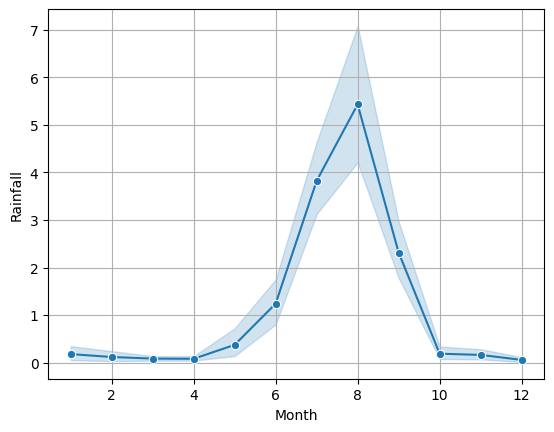

In [15]:
sns.lineplot(y=df["Rainfall"],x=df["Month"],marker="o")
plt.grid()

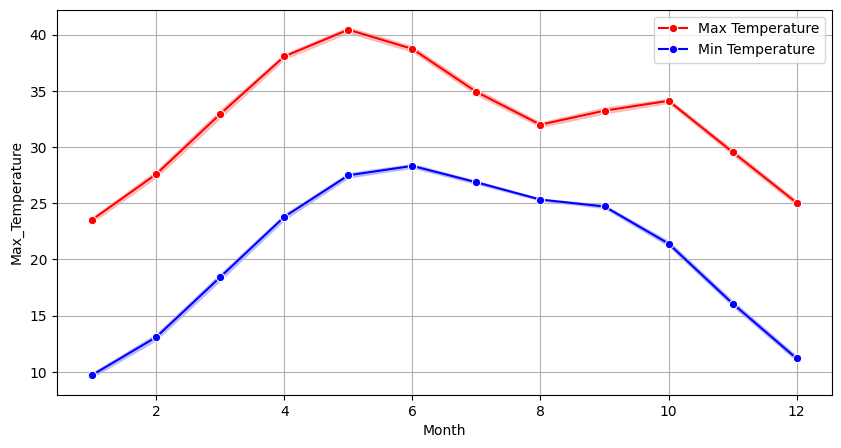

In [16]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Month", y="Max_Temperature", data=df, marker="o", label="Max Temperature", color="red")
sns.lineplot(x="Month", y="Min_Temperature", data=df, marker="o", label="Min Temperature", color="blue")
plt.grid()


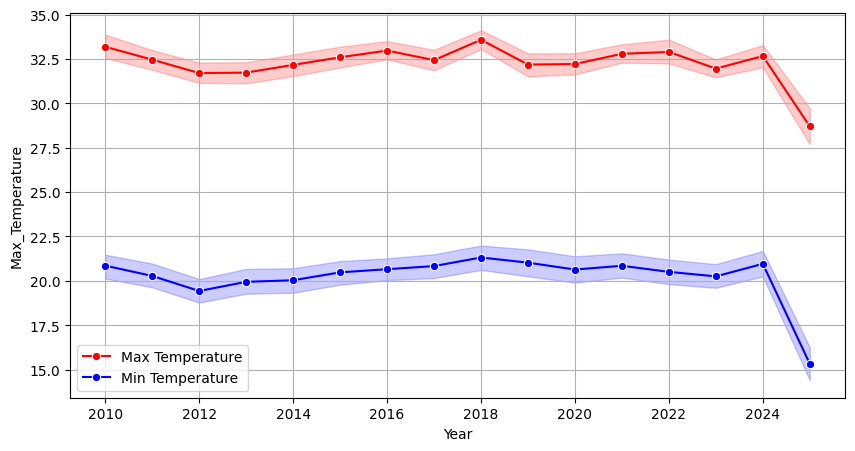

In [17]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Year", y="Max_Temperature", data=df, marker="o", label="Max Temperature", color="red")
sns.lineplot(x="Year", y="Min_Temperature", data=df, marker="o", label="Min Temperature", color="blue")
plt.grid()


<Axes: xlabel='Year', ylabel='Rainfall'>

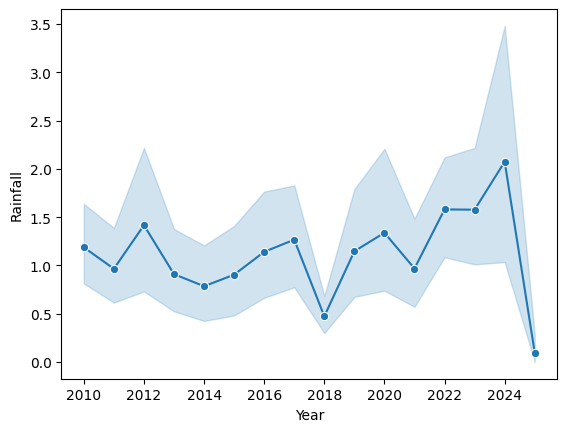

In [18]:
sns.lineplot(y=df["Rainfall"],x=df["Year"],marker="o")

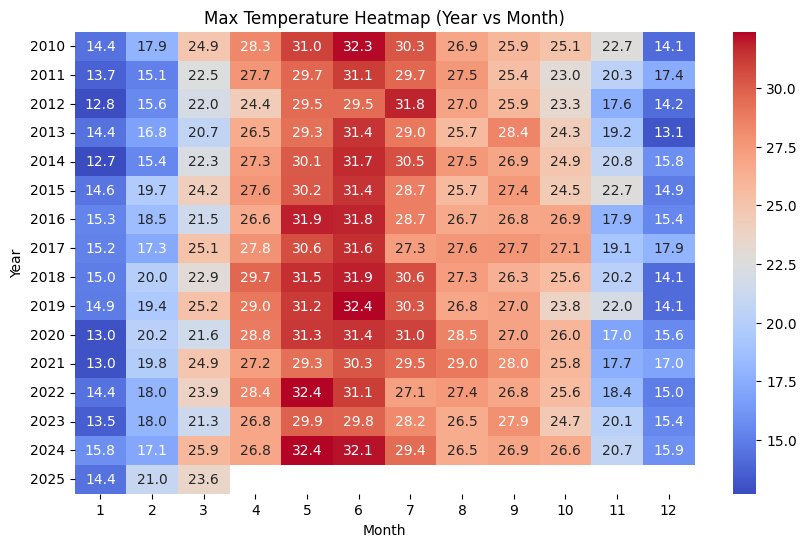

In [19]:
pivot_table = df.pivot_table(values="Min_Temperature", index="Year", columns="Month", aggfunc="max")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".1f")

plt.xlabel("Month")
plt.ylabel("Year")
plt.title("Max Temperature Heatmap (Year vs Month)")
plt.show()


In [20]:
train = df.iloc[:int(0.95 * len(df))]
test = df.iloc[int(0.95 * len(df)):]

In [21]:
train.to_csv("train.csv",index=False)
test.to_csv("test.csv",index=False)

<Axes: >

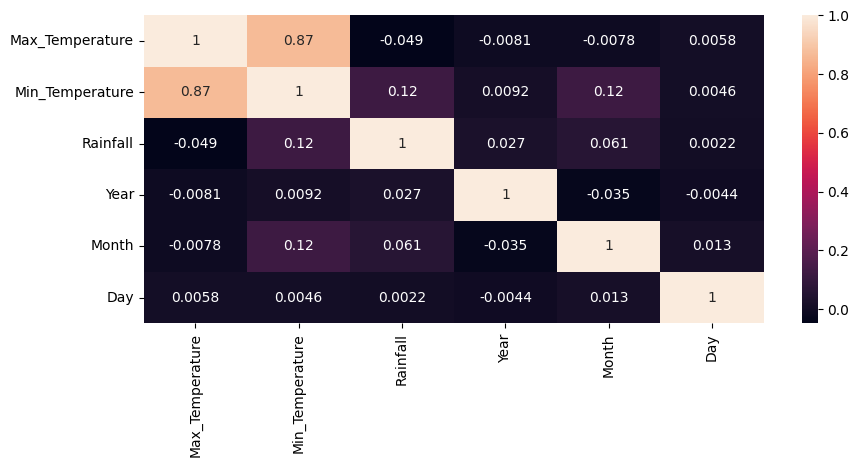

In [22]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True)